# Setup

# Data Fetching

In [2]:
!pip install yfinance prophet -q

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf

# Fetch Bitcoin data
btc_data = yf.download('BTC-USD', start='2014-10-01', end='2024-05-31')
btc_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096


In [10]:
# Summary statistics
summary_stats = btc_data.describe()
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3.530000e+03
mean,16492.625734,16875.873639,16084.209126,16510.644143,16510.644143,1.731341e+10
std,18262.535148,18693.149269,17790.663183,18279.073077,18279.073077,1.924282e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1057.099976,1089.672485,1040.527496,1061.779968,1061.779968,2.532700e+08
50%,8810.702637,8996.875000,8619.237793,8807.636719,8807.636719,1.319026e+10
75%,27266.747070,27790.822754,26836.931641,27292.176758,27292.176758,2.788738e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


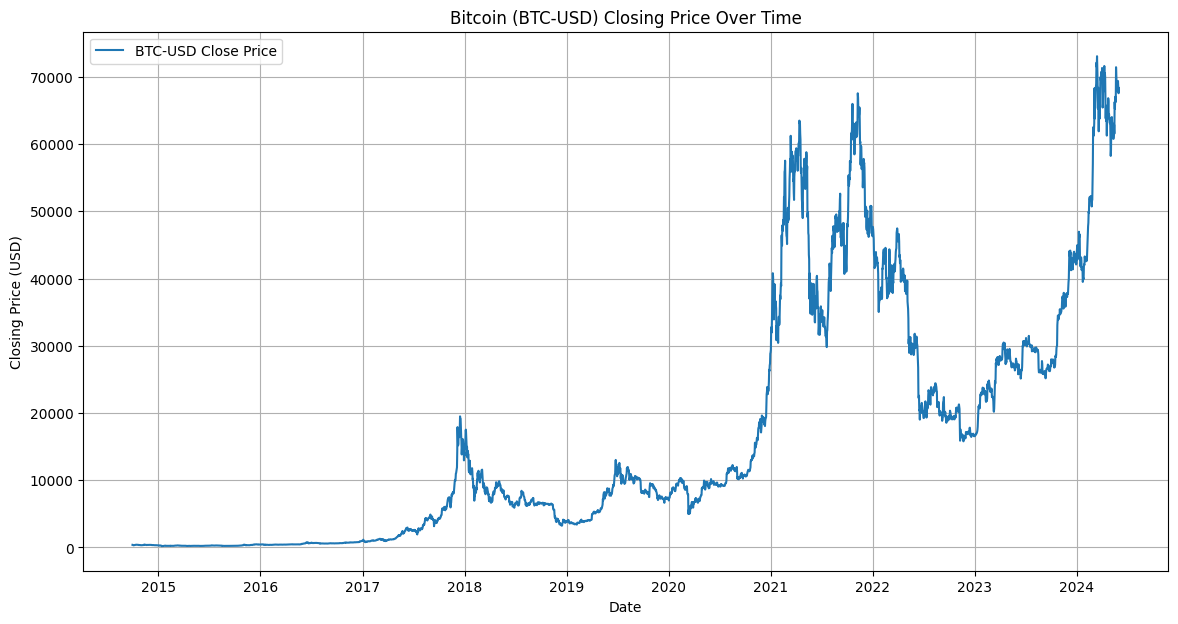

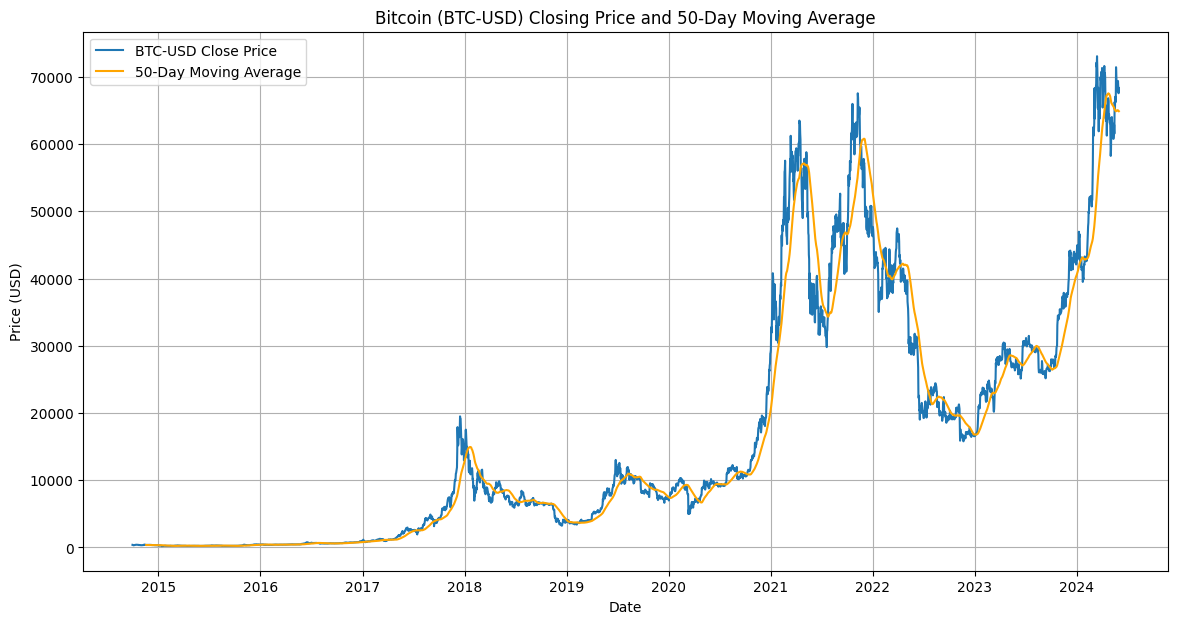

In [11]:
import matplotlib.pyplot as plt

# Plotting the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
plt.title('Bitcoin (BTC-USD) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Calculate and plot the moving average (50-day)
btc_data['50-day MA'] = btc_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
plt.plot(btc_data['50-day MA'], label='50-Day Moving Average', color='orange')
plt.title('Bitcoin (BTC-USD) Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()